# HW4 - Linear Regression
##### 負責助教：張逸群 toosyou.tw@gmail.com
## 評分標準
### 原始分數
* 上課繳交：20%
    * 在當天 16:20 前上傳至 new E3 作業，請將以下打包成 .zip 上傳：
        * 程式原始檔 (.ipynb）
        * 程式 .html 檔
    * 並填寫表單上傳程式執行結果
        * 請上傳 .html 檔案至表單
        * __請統一檔名 <學號>-<姓名>.html__
        * [表單連結](https://docs.google.com/forms/d/e/1FAIpQLSdlbNU_u9kb1QpCdXsgX42gx6UcRYCtVnX4E0xVlkjYyEOgug/viewform)
* 程式分數：80%

### 調整分數
* 你的調整分數 = (你的原始分數 - 全部人原始分數平均) x (15. / 全部人原始分數標準差) + 80.

#### 姓名：林哲宇
#### 學號：0616018

## Packages that Might Be Used

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import Pipeline

%matplotlib inline

## Load Data - 20%

#### 請使用 [np.load](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html) 分別將 `X.npy` 和 `y.npy` 讀入到 `X` 和 `y` - 10%

In [58]:
X = np.load('X.npy')
y = np.load('y.npy')

print(X.shape, y.shape)

((100, 1), (100,))


##### 此組資料共有 100 個點，各點座標為 `(X0, y0), (X1, y1)... (X99, y99)`，而 `X = [X0, X1, ... X99]`，`y = [y0, y1, ... y99]`

#### 請使用 `plt.scatter` 將 100 個點畫出 - 10%

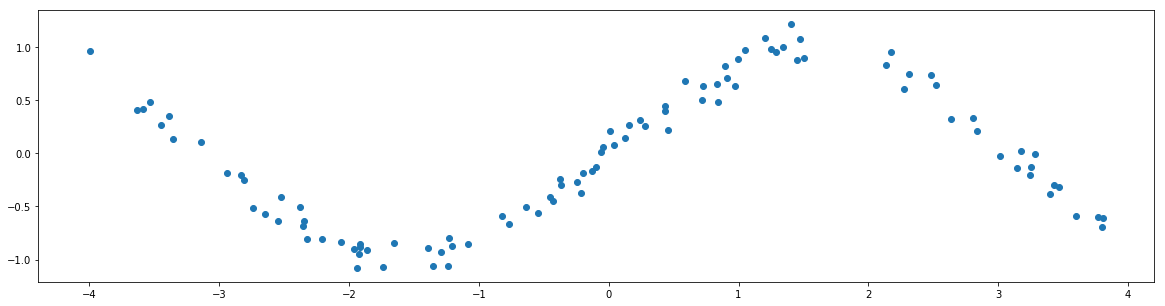

In [59]:
plt.figure(figsize=(20, 5))
plt.scatter(X, y)
plt.show()

## Curve Fitting (1/2) - 30%

#### 請使用 `sklearn.linear_model.LinearRegression` 對 `X` 和 `y` 進行訓練 - 10%

In [60]:
reg = LinearRegression().fit(X, y)

#### 將 `X` 從 -4 至 4 的預測曲線與原始資料（scatter）同時畫出 - 10%
* [hint](https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html)

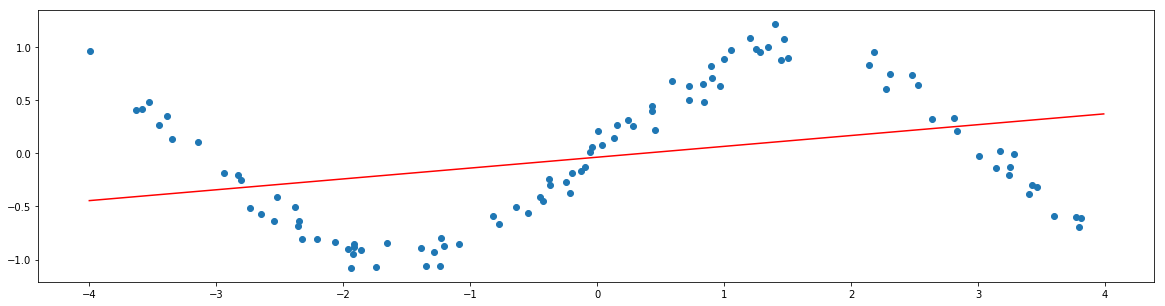

In [61]:
plt.figure(figsize=(20, 5))
plt.scatter(X, y)

plot_X = np.arange(-4, 4, 0.01).reshape(-1, 1)
plt.plot(plot_X, reg.predict(plot_X), color='red')

#### 請簡述為什麼上圖的紅線預測曲線為一直線？ - 5%
* 因為我們拿 testing data 去 predict

#### 請將 Linear Regression 的 `coef_` 印出，並解釋其意義 - 5%
* [hint](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

In [62]:
reg.coef_

array([0.10200816])

* 預測曲線的斜率

## Curve Fitting (2/2) - 50%

#### 為了做到更好的擬合效果，請先定義一 [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)，其包含以下步驟：
1. [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) - 其中參數 `degree = 8`
2. LinearRegression

#### 並使用此 `Pipeline` 對 `X` 和 `y` 進行訓練 - 15%
* hint  
![hint](https://img-blog.csdn.net/20160115095855517)

In [63]:
pipeline = Pipeline(
    memory=None,
     steps=[('poly', PolynomialFeatures(degree=8, include_bias=True, interaction_only=False)), ('clf', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]
)

print(pipeline)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=8, include_bias=True, interaction_only=False)), ('clf', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])


#### 之後使用此 `Pipeline` 將 `X` 從 -4 至 4 的預測曲線與原始資料（scatter）同時畫出 - 10%

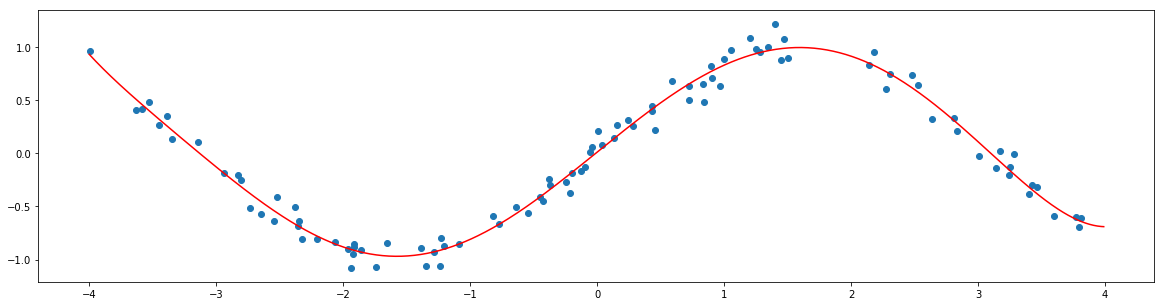

In [64]:
plt.figure(figsize=(20, 5))
plt.scatter(X, y)

pipeline.fit(X, y)
plot_X = np.arange(-4, 4, 0.01).reshape(-1, 1)
plt.plot(plot_X, pipeline.predict(plot_X), color='red')

#### 使用 `pipeline` 印出 Prediction Score - 0%

In [65]:
print('Prediction score:', pipeline.score(X, y))

('Prediction score:', 0.9772100048002959)


#### 請簡述下列問題 - 15%

1. `PolynomialFeatures` 做了什麼事情？`PolynomialFeatures(8).fit_transform([[2]])`的結果為何？ - 5%
    * (1) 把每個將要輸入的參數在最多有 degree 個參數的組合的範圍內窮舉所有可能組合
    * (2) [[  1.   2.   4.   8.  16.  32.  64. 128. 256.]]
2. 使用此 `Pipeline` 所預測的曲線為何？請以曲線方程式表示 - 5%
    * y = f(x) = 0.0000248812895 * X^8 + -0.0000855171283 * X^7 + -0.000553008486 * X^6 + 0.00640975838 * X^5 + 0.00316146625 * X^4 + -0.153700587 * X^3 + -0.00414835999 * X^2 + 0.966162254 * X + 0 * X^0
3. 在此 regression 問題中，請問 prediction score 的意義為何？為什麼不使用 accuracy 作為 score？ - 5%
    * (1) 回歸曲線的相關係數
    * (2) 因為預測出來的曲線是找出相關係數最高的曲線，所以點幾乎不會在預測出來的線上

## 恭喜完成 - ふわふわ時間

![ひとりぼっちの○○生活](https://66.media.tumblr.com/265f74467c1fc0bffeb87d689224e1e5/tumblr_ppi3ytBST81qz64n4o1_500.gif)  
![世話やきキツネの仙狐さん](https://images2.gamme.com.tw/news2/2019/22/72/qJeWoqaemKSXsKU.gif)  
![mugi](http://i.imgur.com/V34BvRo.gif)  

## Ｕ沒Ｕ想對助教教說ㄉ話 <3

* 辛苦了XD